In [36]:
import pandas as pd
import plotly.express as px

In [37]:
fleet_sizes = [20, 40, 80, 160]

df_comparison = []

for fleet_size in fleet_sizes:
    df = pd.read_csv("veh{}_output/drt_customer_stats_drt.csv".format(fleet_size), sep = ";")
    rejection_rate = float(df["rejectionRate"].values[0])

    df = pd.read_csv("veh{}_output/ITERS/it.0/0.vehicleDistanceStats_drt.csv".format(fleet_size), sep = ";")
    empty_distance_share = df["emptyDistance_m"].sum() / df["drivenDistance_m"].sum()

    df_comparison.append({
        "fleet_size": fleet_size,
        "rejection_rate": rejection_rate,
        "empty_distance_share": empty_distance_share
    })
    
df_comparison = pd.DataFrame.from_records(df_comparison)

In [38]:
df_comparison

,fleet_size,rejection_rate,empty_distance_share
0,20,0.42,0.203012
1,40,0.42,0.203012
2,80,0.23,0.203041
3,160,0.23,0.200488


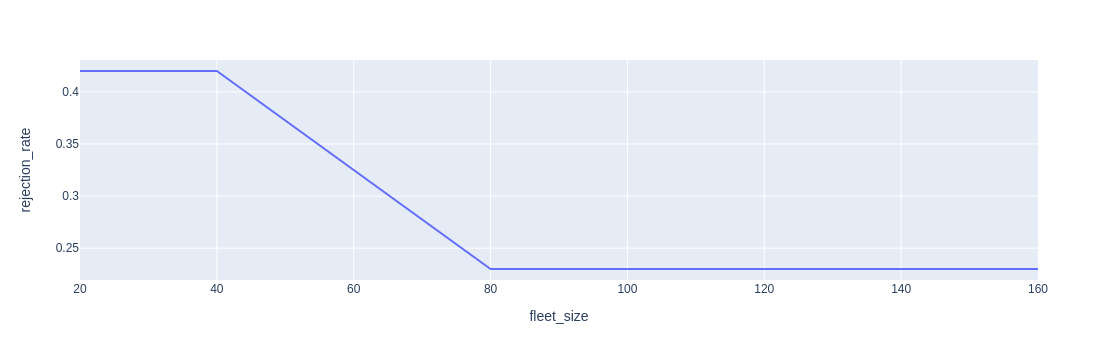

In [39]:
px.line(df_comparison, x = "fleet_size", y = "rejection_rate")

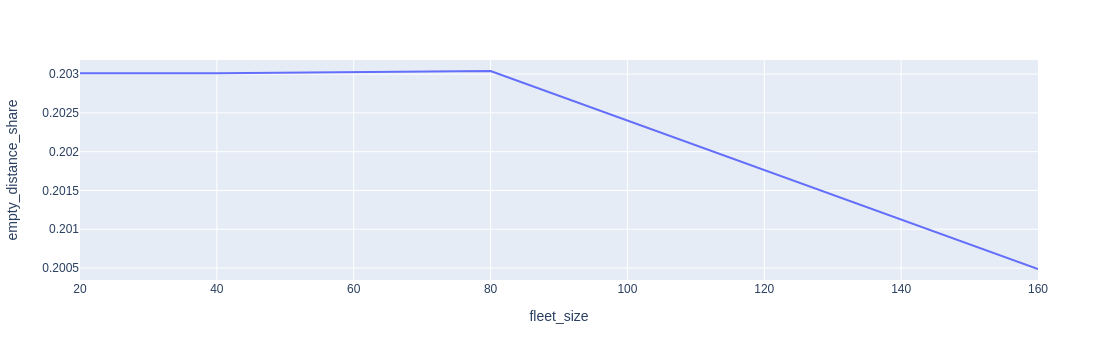

In [40]:
px.line(df_comparison, x = "fleet_size", y = "empty_distance_share")

In [41]:
df_rejections = pd.read_csv("veh20_output/ITERS/it.0/0.drt_rejections_drt.csv", sep = ";")
df_rejections

,time,personId,fromLinkId,toLinkId,fromX,fromY,toX,toY
0,31874.0,81,2536486830008f,6903746890001f,650395.638593,6.858350e+06,652526.156727,6.861009e+06
1,34753.0,22,165541130003f,35993270004f,654639.980456,6.859448e+06,652912.296377,6.858647e+06
2,30766.0,23,237826920009f,799463800001f,653033.474549,6.857742e+06,653150.530104,6.860167e+06
3,33112.0,964,42304800002f,2229887590002f,652054.685878,6.866953e+06,653328.250226,6.865733e+06
4,30766.0,130,44141900005f,185103990005f,653102.104653,6.860945e+06,650220.189863,6.863134e+06
...,...,...,...,...,...,...,...,...
413,27418.0,382,40393560005f,302770320013f,654723.491449,6.858767e+06,657452.549995,6.859056e+06
414,27569.0,998,1566204890007f,7116282090002f,654431.519630,6.865635e+06,651628.988174,6.866639e+06
415,27645.0,725,238657070001f,247197600003f,655167.243957,6.863471e+06,656858.730281,6.863914e+06
416,27588.0,762,12274552390000f,1883696480003f,656745.154469,6.861655e+06,656490.999472,6.863488e+06


In [42]:
import shapely.geometry as sgeo
import geopandas as gpd

In [43]:
df_rejections["geometry"] = gpd.points_from_xy(df_rejections["fromX"], df_rejections["fromY"])

In [44]:
df_rejections = gpd.GeoDataFrame(df_rejections, crs = "EPSG:2154")

<Axes: >

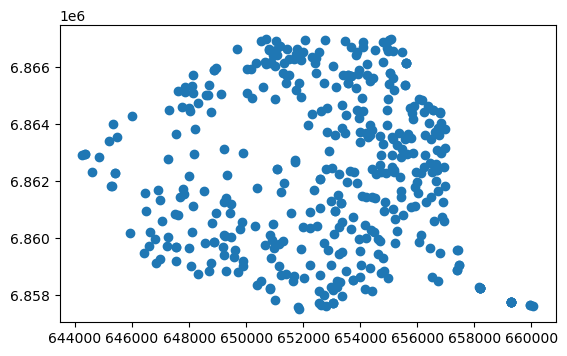

In [45]:
df_rejections.plot()